# Final S9

In [1]:
# !pip install -U git+https://github.com/albu/albumentations

In [1]:
!nvidia-smi

Wed Oct  7 10:26:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import time
import torch
# mount gdrive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
import sys
folder = '/content/gdrive/My Drive/S9'
sys.path.append(folder)
# sys.path

In [4]:
import os
os.getcwd()

'/content'

In [5]:
%cd '/content/gdrive/My Drive/S9'

/content/gdrive/My Drive/S9


In [6]:
os.listdir()

['requirements.txt', 'models', 'wrapper', 'config.cfg', 'sample_images']

In [7]:
!pip install -r requirements.txt

In [8]:
from wrapper.main_new import run_model_run
from wrapper import utility


 CUDA is available


In [9]:
print(utility.check_gpu_availability())


 CUDA is available
True


Files already downloaded and verified
Files already downloaded and verified

 CUDA is available

 CUDA is available


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

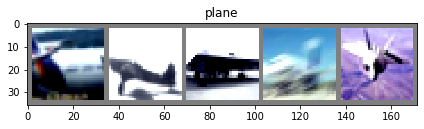

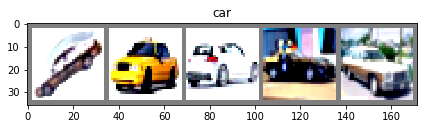

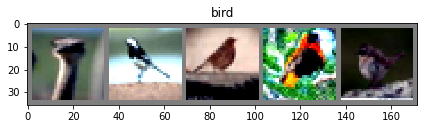

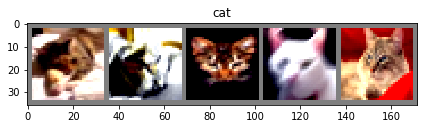

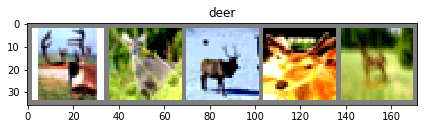

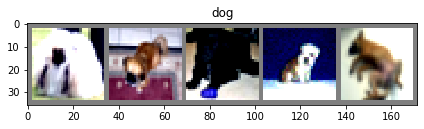

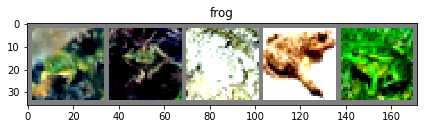

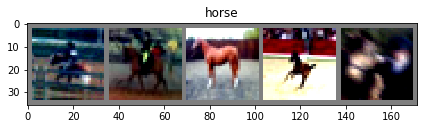

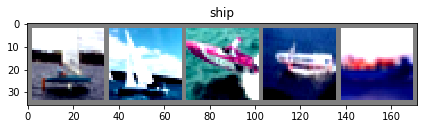

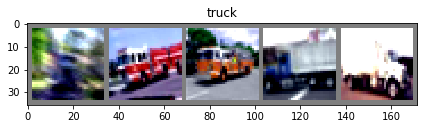

In [10]:
start = time.perf_counter()
metrics, model, test_data = run_model_run(dataset="cifar10", model="resnet18",use_albumentation=True, cutout=False)
end = time.perf_counter()

In [11]:
print(f"total time = {end - start}")

total time = 1425.435622205001


In [13]:
torch.save(model, "resnet18_cifar10_93_40_epochs.pth")

In [15]:
torch.save(model.state_dict(), "resnet18_cifar10_93_40_epochs_state_dict.pth")

In [18]:
from wrapper import GradCAM, utility

In [19]:
os.getcwd()

'/content/gdrive/My Drive/S9'

In [25]:
images = [os.path.join(os.getcwd(), "sample_images", f) for f in os.listdir("sample_images")]

In [26]:
images

['/content/gdrive/My Drive/S9/sample_images/dog10.png',
 '/content/gdrive/My Drive/S9/sample_images/airplane5.png',
 '/content/gdrive/My Drive/S9/sample_images/automobile10.png']

In [32]:
# utility.grad_cam_showtime(images=images, device=utility.get_device(),model=model,
#                           classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'),
#                           layers=[model.layer3[1].conv2])

In [56]:
# gradcam = GradCAM.GradCAM(model=model, layer_name=layer3)

In [35]:
import PIL

pil_image = []
for i,img in enumerate(images):
   pil_image.append(PIL.Image.open(img))

In [38]:
from torchvision import transforms
normed_torch_img = []
torch_img_list = []

for i in pil_image:
  torch_img = transforms.Compose([
      transforms.Resize((32, 32)),
      transforms.ToTensor()])(i).to(utility.get_device())
  torch_img_list.append(torch_img)
  normed_torch_img .append(transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])(torch_img)[None])


 CUDA is available

 CUDA is available

 CUDA is available


In [47]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img,c = "" ):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')
    plt.title(c)


 CUDA is available

 CUDA is available

 CUDA is available


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


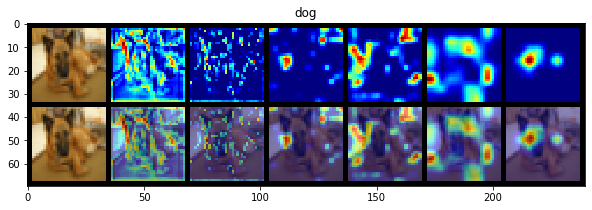

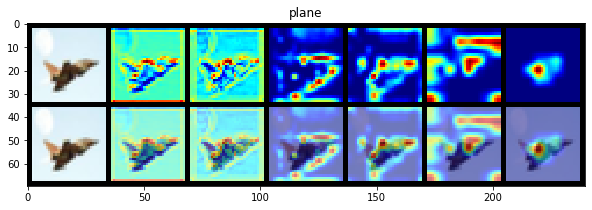

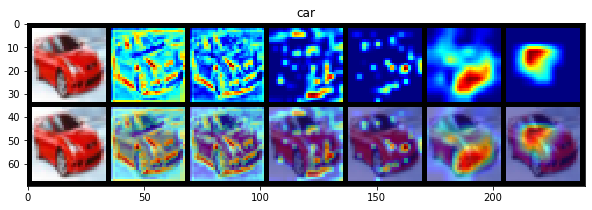

In [66]:
import copy
from torchvision.utils import make_grid, save_image
from wrapper.GradCAM import *

classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

for i,k in enumerate(normed_torch_img):
  images1 = [torch_img_list[i].cpu()]
  images2 =  [torch_img_list[i].cpu()]
  b = copy.deepcopy(model.to(utility.get_device()))
  output = model(normed_torch_img[i])
  _, predicted = torch.max(output.data, 1)

  '''first 3 layers and their sub-layers with size MORE THAN 7x7'''
  layers =  [b.layer1[0], b.layer1[1],b.layer2[0], b.layer2[1],b.layer3[0], b.layer3[1]] 
  for j in layers:
    g = GradCAM(b,j)
    mask, _= g(normed_torch_img[i])
    heatmap, result = visualize_cam(mask,torch_img_list[i] )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2,nrow=7)
  imshow(grid_image,c = classes[int(predicted)])
  